In [4]:
DATA_DIR = "../data/laks"

In [5]:
%load_ext autoreload
%autoreload 2

In [7]:
import sys
sys.path.append("..")

In [98]:
import importlib
import src.laks_data

In [99]:
from src.laks_data import Laks

laks = Laks(DATA_DIR=DATA_DIR)

In [100]:
F = laks.get_cell_fractions()
F

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.0,1.0,0.000000,0.833333,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.434783,1.000000,0.000000,0.0,1.000000,0.0,0.000000
B,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.800000,1.000000,0.000000,0.0,1.000000,0.0,0.000000
C,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.066667,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.000000,0.0,0.000000
D,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,0.555556,0.000000,1.0,1.000000,0.0,0.000000
E,1.0,1.0,1.0,0.784314,0.000000,1.000000,0.625000,0.625,0.606061,1.0,...,0.0,0.769231,0.095238,0.000000,0.666667,0.000000,0.0,0.952381,1.0,0.000000
F,1.0,1.0,1.0,1.000000,0.000000,0.190476,1.000000,1.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.0,0.000000
G,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.842105,0.0,1.000000,0.0,0.909091
H,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.173913,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.909091,0.0,1.000000,0.0,1.000000
I,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,0.869565,0.250000,0.0,1.000000,0.0,1.000000


In [101]:
from src.phylogeny_utils import plot_spectral_clustering

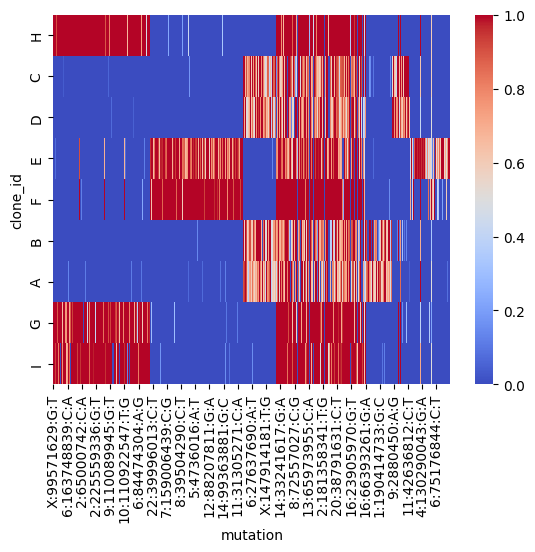

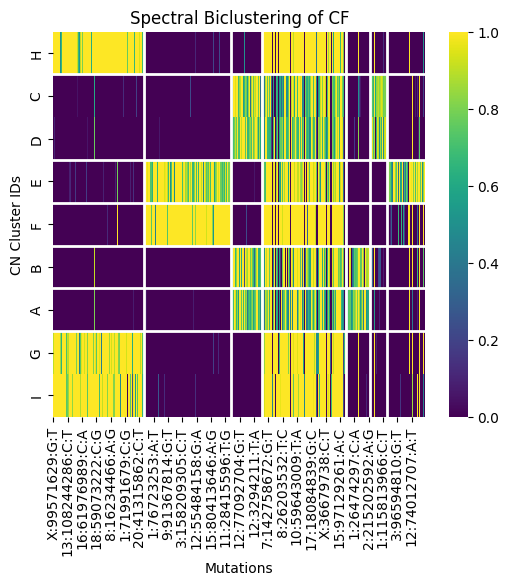

In [102]:
plot_spectral_clustering(F)

# K-means Clustering

In [9]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score


ranges = range(9, 25, 1)
runs_per_k = 10

X = F.T.to_numpy()

silhouette_scores = []
all_labels = []


for k in ranges:
    print(k)
    for i in range(runs_per_k):
        kmeans = KMeans(n_clusters=k, random_state=i * 100)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
        all_labels.append(labels)

9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [10]:
sillhouettes_scores_per_k = np.array(silhouette_scores).reshape((len(ranges), runs_per_k))
best_silhouettes_for_k = np.min(sillhouettes_scores_per_k, axis=1)
best_silhouettes_for_k

array([0.6058519 , 0.58074426, 0.55583069, 0.53371578, 0.53737277,
       0.53590316, 0.52730148, 0.50650198, 0.48775419, 0.49038852,
       0.48708835, 0.46645345, 0.45835115, 0.45980624, 0.4621977 ,
       0.44731976])

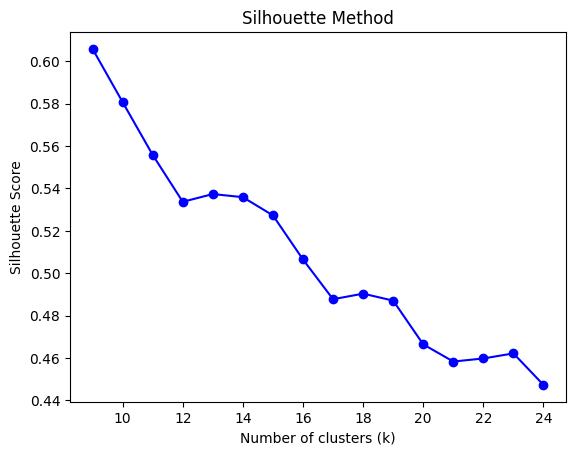

In [11]:
import matplotlib.pyplot as plt

plt.plot(ranges, best_silhouettes_for_k, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [122]:
best_k = 12

ranges = np.array(ranges)

index_of_best_k = int(np.where(ranges == best_k)[0][0])

silhouette_scores_of_best_k = sillhouettes_scores_per_k[index_of_best_k, :]

best_label_index_of_best_best = np.argmin(silhouette_scores_of_best_k)

labels_per_k = np.array(all_labels).reshape((len(ranges), runs_per_k, -1))

best_labels = labels_per_k[index_of_best_k, best_label_index_of_best_best]

In [133]:
import pandas as pd

kmeans_labels = pd.DataFrame({
    'mutation': F.columns.to_list(),
    'clone': best_labels
})
kmeans_labels

,mutation,clone
0,10:100129846:C:A,1
1,10:100185101:A:G,1
2,10:100209326:T:C,2
3,10:100283942:C:T,9
4,10:10086005:G:T,7
...,...,...
14063,X:98278474:C:A,0
14064,X:98452192:T:C,5
14065,X:98700894:C:T,2
14066,X:99136386:C:T,1


In [134]:
kmeans_labels.loc[kmeans_labels['clone'] == 8, 'clone'] = 2

In [135]:
kmeans_labels.groupby("clone")["mutation"].count()

clone
0      310
1     2406
2     2914
3     1186
4     1400
5      640
6     3133
7      685
9      953
10     248
11     193
Name: mutation, dtype: int64

In [136]:
PHERTILIZER_OUTPUTS = "../phertilizer-outputs/laks"
df_phertilizer_mutations = pd.read_csv(f"{PHERTILIZER_OUTPUTS}/SNV_clusters.csv")
df_phertilizer_mutations["mutation"] = df_phertilizer_mutations["mutation"].str.split("_").str[1]
df_phertilizer_mutations.rename(columns={"cluster": "phertilizer_clone"}, inplace=True)
df_phertilizer_mutations

,phertilizer_clone,mutation
0,7,10:100129846:C:A
1,7,10:100185101:A:G
2,0,10:100209326:T:C
3,7,10:100283942:C:T
4,5,10:10086005:G:T
...,...,...
13827,2,X:98278474:C:A
13828,4,X:98452192:T:C
13829,0,X:98700894:C:T
13830,7,X:99136386:C:T


In [137]:
merged = pd.merge(kmeans_labels, df_phertilizer_mutations, on='mutation', how='left')
merged["phertilizer_clone"] = merged["phertilizer_clone"].fillna(-1).astype(int)
merged["clone"] = (merged["clone"]).fillna(-1).astype(int)
merged

,mutation,clone,phertilizer_clone
0,10:100129846:C:A,1,7
1,10:100185101:A:G,1,7
2,10:100209326:T:C,2,0
3,10:100283942:C:T,9,7
4,10:10086005:G:T,7,5
...,...,...,...
14063,X:98278474:C:A,0,2
14064,X:98452192:T:C,5,4
14065,X:98700894:C:T,2,0
14066,X:99136386:C:T,1,7


In [138]:
merged["clone"].unique()

array([ 1,  2,  9,  7,  4,  5, 11,  6,  3,  0, 10])

In [139]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(merged["clone"], merged["phertilizer_clone"])

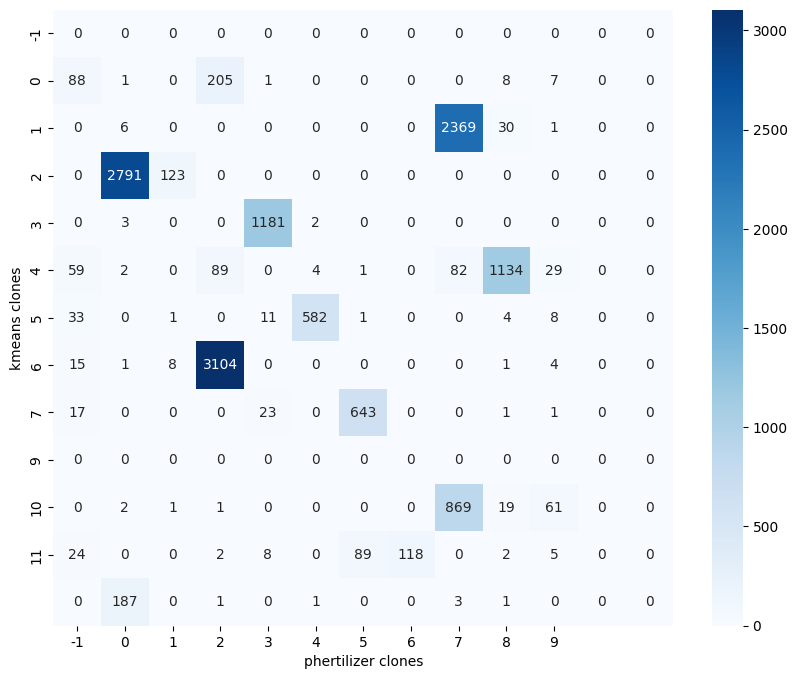

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

y_labels = [-1] + sorted(merged["clone"].unique())
x_labels = sorted(merged["phertilizer_clone"].unique())

plt.figure(figsize=(10, 8))

sns.heatmap(cm, annot=True, fmt="d", xticklabels=x_labels, yticklabels=y_labels, cmap="Blues")
plt.ylabel("kmeans clones")
plt.xlabel("phertilizer clones")
plt.show()


['I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']


/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_93863/576708756.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.index)
/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_93863/576708756.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.index)
/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_93863/576708756.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.index)
/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_93863/576708756.py:44: 

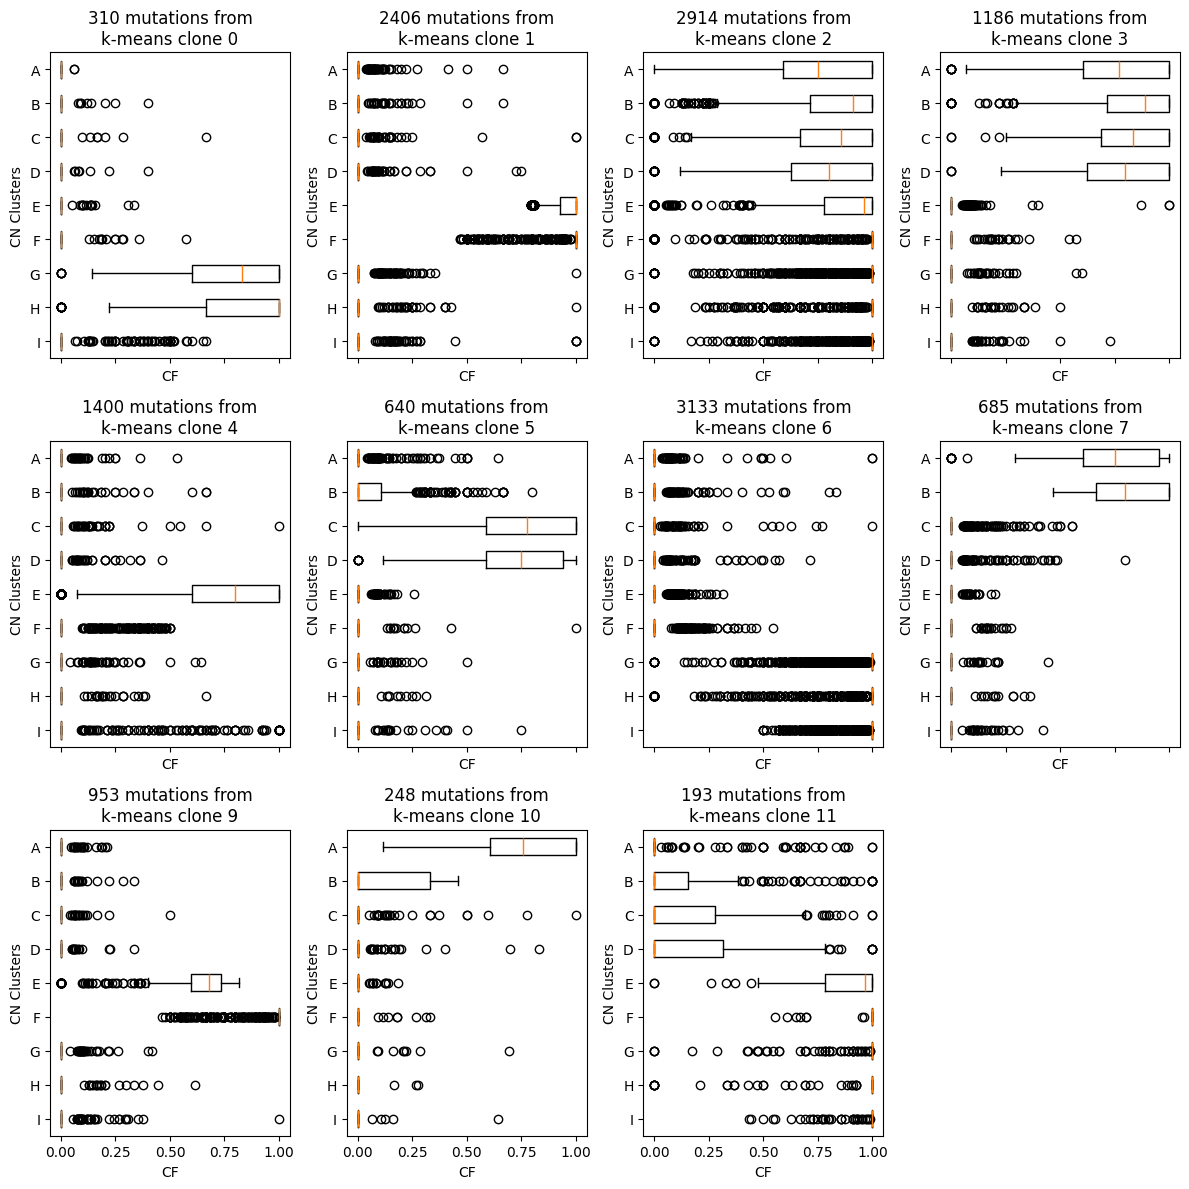

In [141]:
import matplotlib.pyplot as plt
import numpy as np

clusters = sorted(merged["clone"].unique())
n_clusters = len(clusters)

# Set up subplot grid: 2 columns
n_cols = 4
n_rows = (n_clusters + 2) // n_cols

fig, axes = plt.subplots(
    nrows=n_rows, ncols=n_cols,
    figsize=(12, 4 * n_rows),
    sharex=True
)

axes = axes.flatten()

# Define explicit CN cluster order
cn_order = sorted(F.index.unique())[::-1]  # or use a fixed list if known: ['A','B','C','D','E','F','G','H','I']
print(cn_order)

for i, cluster in enumerate(clusters):
    ax = axes[i]

    # Get mutations for this cluster
    mutations_in_cluster = merged[
        merged["clone"] == cluster
    ]["mutation"]

    df = F[mutations_in_cluster]

    # Ensure consistent y-axis order (A→I)
    df = df.loc[cn_order]

    F_clust = df.to_numpy()

    thres = 0.75
    median = np.median(F_clust, axis=1)
    upper_percentiles = np.percentile(F_clust, axis=1, q=int(100 * thres))
    lower_percentiles = np.percentile(F_clust, axis=1, q=int(100 * (1 - thres)))

    # Horizontal boxplot per clone, sorted A→I
    ax.boxplot(df.T.values, vert=False, labels=df.index)

    ax.set_ylabel("CN Clusters")
    ax.set_xlabel("CF")
    ax.set_title(f"{df.shape[1]} mutations from\nk-means clone {cluster}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

[0.         0.         0.         0.         0.         0.
 0.82843137 1.         0.        ]
[0. 0. 0. 0. 0. 0. 1. 1. 0.]
[0.         0.         0.         0.         0.         0.
 0.60151515 0.66666667 0.        ]
[0. 0. 0. 0. 1. 1. 0. 0. 0.]
[0. 0. 0. 0. 1. 1. 0. 0. 0.]
[0.         0.         0.         0.         0.92592593 1.
 0.         0.         0.        ]
[0.75       0.90909091 0.85714286 0.8        0.96153846 1.
 1.         1.         1.        ]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.58823529 0.71428571 0.66666667 0.62664474 0.77922078 1.
 1.         1.         1.        ]
[0.76923077 0.88888889 0.83333333 0.8        0.         0.
 0.         0.         0.        ]
[1. 1. 1. 1. 0. 0. 0. 0. 0.]
[0.60606061 0.71428571 0.68965517 0.625      0.         0.
 0.         0.         0.        ]
[0.  0.  0.  0.  0.8 0.  0.  0.  0. ]
[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0.         0.         0.         0.         0.60180723 0.
 0.         0.         0.        ]
[0.         0.         0.77591973 0.

/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_93863/2391180796.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.index)
/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_93863/2391180796.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.index)
/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_93863/2391180796.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.index)
/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_93863/2391180796.py:

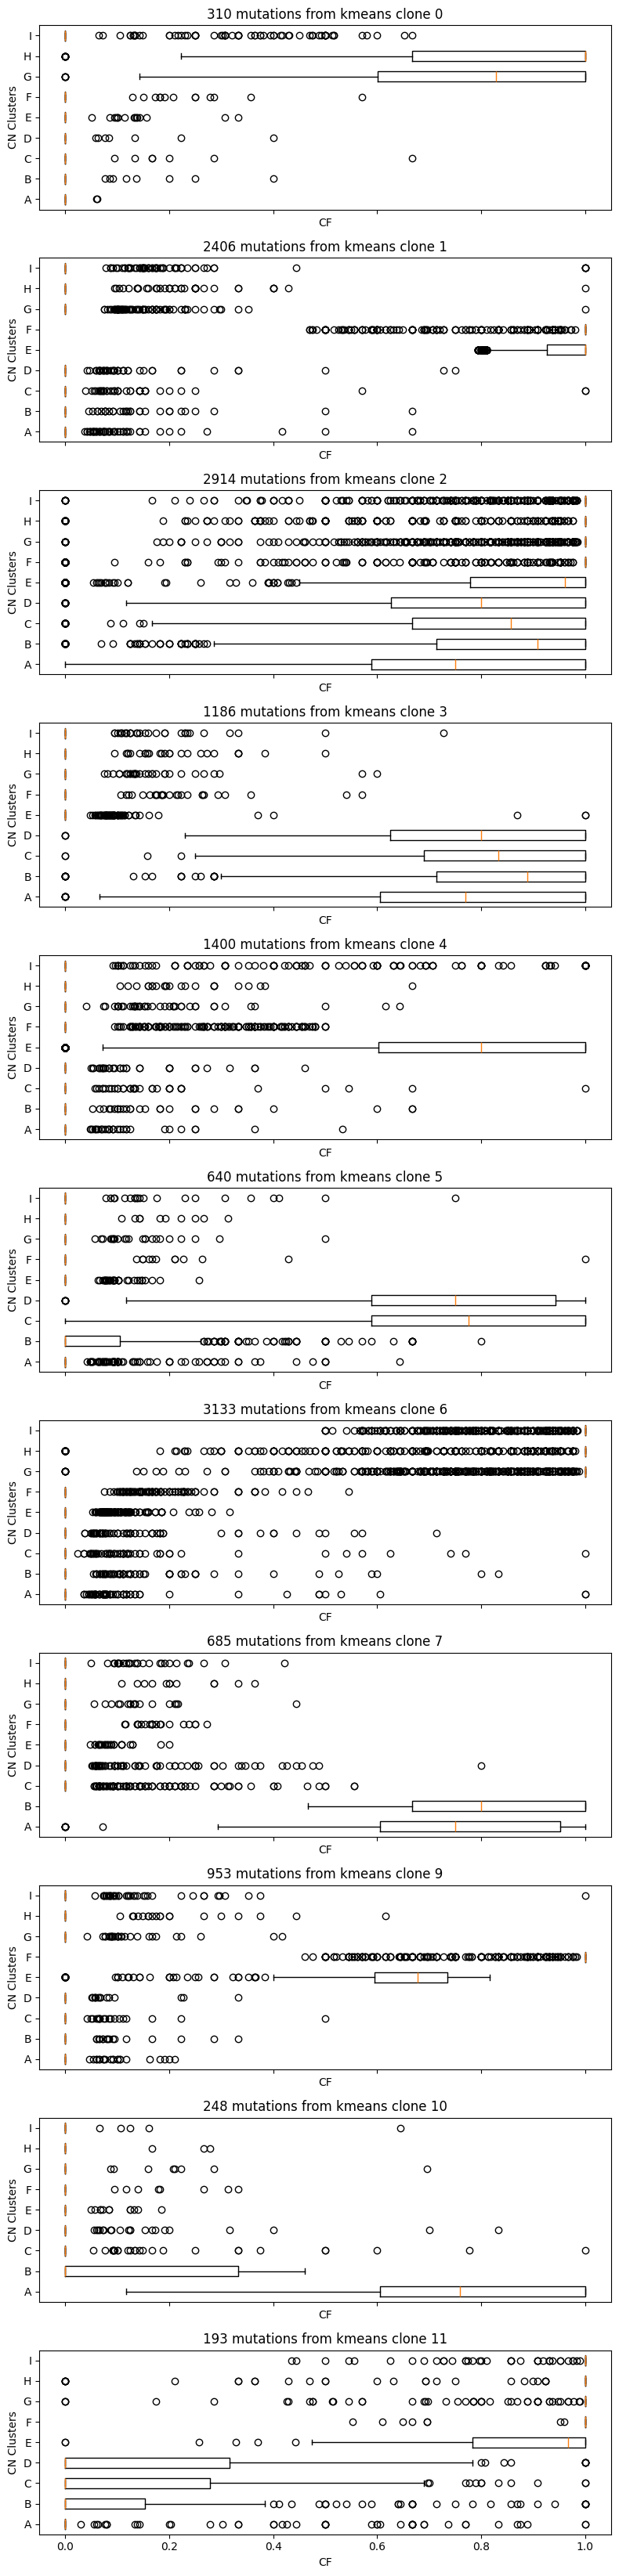

In [142]:
import matplotlib.pyplot as plt

clones = sorted(kmeans_labels["clone"].unique())
n_clones = len(clones)

fig, axes = plt.subplots(nrows=n_clones, figsize=(8, 3*n_clones), sharex=True)

# If only one cluster, axes might not be a list
if n_clones == 1:
    axes = [axes]


medians = []
upper_percentiless = []
lower_percentiless = []

for ax, clone in zip(axes, clones):
    # Get mutations for this cluster
    mutations_in_cluster = kmeans_labels[kmeans_labels["clone"] == clone]["mutation"]

    df = F[mutations_in_cluster]

    F_clust = df.to_numpy()

    thres = 0.75
    median = np.median(F_clust, axis=1)
    upper_percentiles = np.percentile(F_clust, axis=1, q=int(100*thres))
    lower_percentiles = np.percentile(F_clust, axis=1, q=int(100*(1-thres)))

    print(median)
    print(upper_percentiles)
    print(lower_percentiles)

    medians.append(median)
    upper_percentiless.append(upper_percentiles)
    lower_percentiless.append(lower_percentiles)

    # Horizontal boxplot per clone
    ax.boxplot(df.T.values, vert=False, labels=df.index)

    ax.set_ylabel(f"CN Clusters")
    ax.set_xlabel("CF")
    ax.set_title(f"{df.shape[1]} mutations from kmeans clone {clone}")

plt.tight_layout()
plt.show()


In [143]:
medians = np.vstack(medians).T
upper_percentiless = np.vstack(upper_percentiless).T
lower_percentiless = np.vstack(lower_percentiless).T

In [144]:
F_bar = pd.DataFrame(medians, index=F.index)
F_bar

,0,1,2,3,4,5,6,7,8,9,10
clone_id,,,,,,,,,,,
A,0.000000,0.0,0.750000,0.769231,0.0,0.00000,0.0,0.75,0.000000,0.759615,0.000000
B,0.000000,0.0,0.909091,0.888889,0.0,0.00000,0.0,0.80,0.000000,0.000000,0.000000
C,0.000000,0.0,0.857143,0.833333,0.0,0.77592,0.0,0.00,0.000000,0.000000,0.000000
D,0.000000,0.0,0.800000,0.800000,0.0,0.75000,0.0,0.00,0.000000,0.000000,0.000000
E,0.000000,1.0,0.961538,0.000000,0.8,0.00000,0.0,0.00,0.677966,0.000000,0.967742
F,0.000000,1.0,1.000000,0.000000,0.0,0.00000,0.0,0.00,1.000000,0.000000,1.000000
G,0.828431,0.0,1.000000,0.000000,0.0,0.00000,1.0,0.00,0.000000,0.000000,1.000000
H,1.000000,0.0,1.000000,0.000000,0.0,0.00000,1.0,0.00,0.000000,0.000000,1.000000
I,0.000000,0.0,1.000000,0.000000,0.0,0.00000,1.0,0.00,0.000000,0.000000,1.000000


In [145]:
F_hi = pd.DataFrame(upper_percentiless, index=F.index)
F_hi

,0,1,2,3,4,5,6,7,8,9,10
clone_id,,,,,,,,,,,
A,0.0,0.0,1.0,1.0,0.0,0.000000,0.0,0.952381,0.000000,1.000000,0.000000
B,0.0,0.0,1.0,1.0,0.0,0.105263,0.0,1.000000,0.000000,0.333333,0.153846
C,0.0,0.0,1.0,1.0,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.277778
D,0.0,0.0,1.0,1.0,0.0,0.942724,0.0,0.000000,0.000000,0.000000,0.315789
E,0.0,1.0,1.0,0.0,1.0,0.000000,0.0,0.000000,0.735294,0.000000,1.000000
F,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.000000
G,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.000000,1.000000
H,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.000000,1.000000
I,0.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.000000,1.000000


In [146]:
F_lo = pd.DataFrame(lower_percentiless, index=F.index)
F_lo

,0,1,2,3,4,5,6,7,8,9,10
clone_id,,,,,,,,,,,
A,0.000000,0.000000,0.588235,0.606061,0.000000,0.000000,0.0,0.606061,0.000000,0.606061,0.000000
B,0.000000,0.000000,0.714286,0.714286,0.000000,0.000000,0.0,0.666667,0.000000,0.000000,0.000000
C,0.000000,0.000000,0.666667,0.689655,0.000000,0.588235,0.0,0.000000,0.000000,0.000000,0.000000
D,0.000000,0.000000,0.626645,0.625000,0.000000,0.588235,0.0,0.000000,0.000000,0.000000,0.000000
E,0.000000,0.925926,0.779221,0.000000,0.601807,0.000000,0.0,0.000000,0.595238,0.000000,0.782609
F,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000
G,0.601515,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000
H,0.666667,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000
I,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000


In [2]:
cluster_weights = merged.groupby("clone").size().tolist()
cluster_weights

NameError: name 'merged' is not defined

In [8]:
import importlib
import src.solve_ilp
import src.phylogeny_utils

importlib.reload(src.solve_ilp)
importlib.reload(src.phylogeny_utils)

<module 'src.phylogeny_utils' from '/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py'>

In [9]:
from src.solve_ilp import solve_cncff

solutions = solve_cncff(F_hi, F_lo, len(F_hi.columns), n_solutions=50, cluster_weights=cluster_weights)

NameError: name 'F_hi' is not defined

In [166]:
len(solutions)

50

In [167]:
from src.phylogeny_utils import generate_perfect_phylogeny, fix_T, draw_clone_tree, add_clusters_to_clonal_T

/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


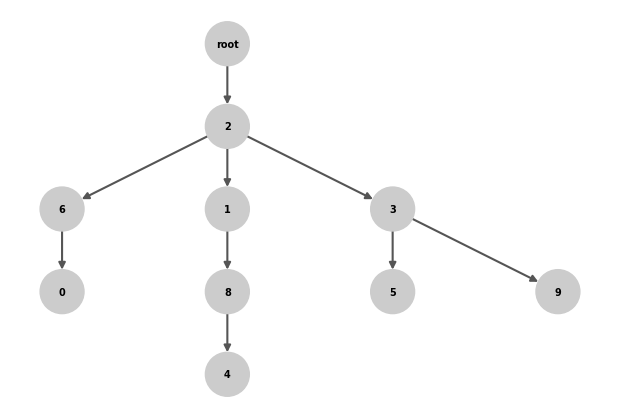

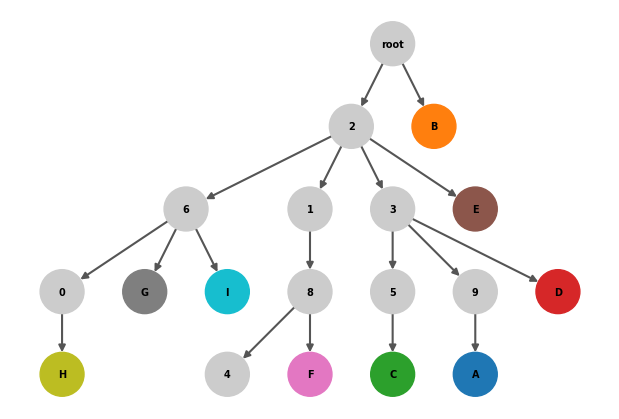

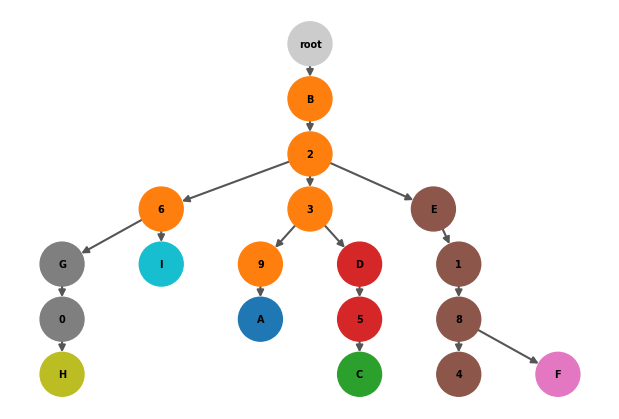

/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


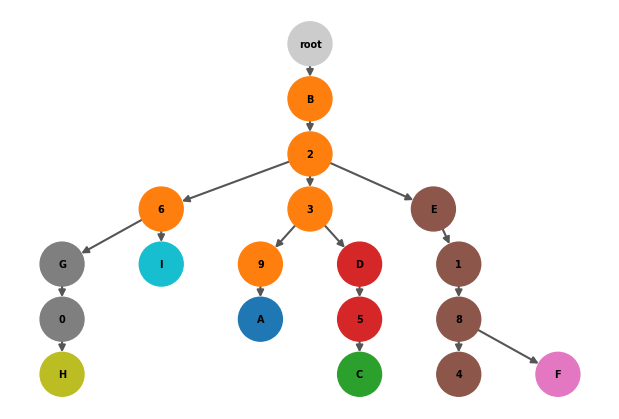

In [168]:
X, B, U, F, G = solutions[0]
# print(X[X>0.5].dropna().index.tolist())
solT_mut, solT_cell = generate_perfect_phylogeny(B)
draw_clone_tree(solT_mut)
draw_clone_tree(solT_cell)
fixed_T = fix_T(B, G, solT_cell)
draw_clone_tree(fixed_T)
appended_T = add_clusters_to_clonal_T(solT_mut, X, G, B)
draw_clone_tree(appended_T)


In [170]:
X

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,-0.0
8,1.0
9,1.0


0


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


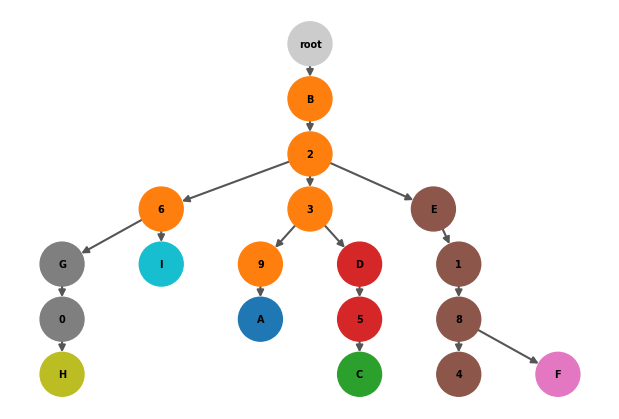

1


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


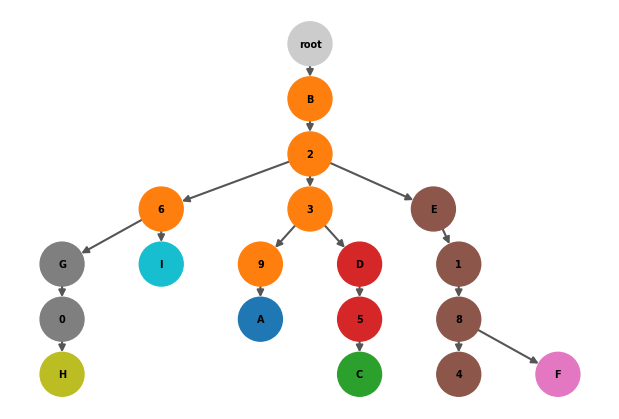

2


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


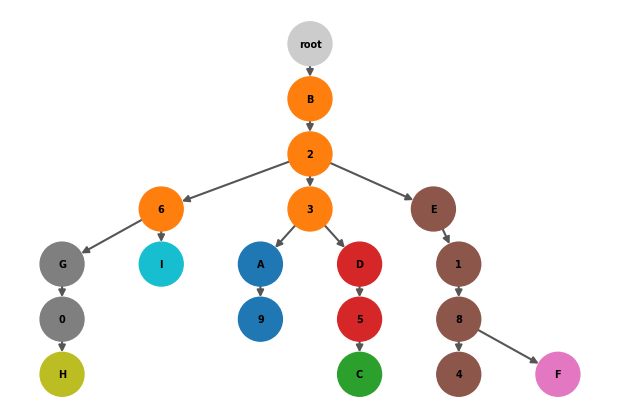

3


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


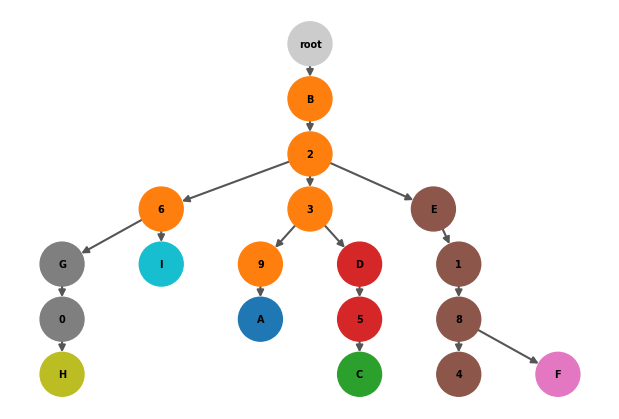

4


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


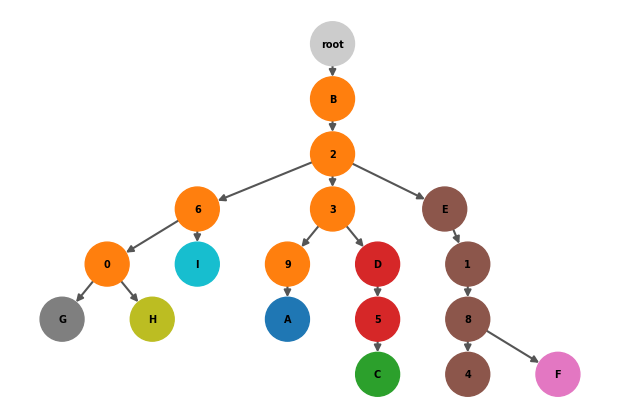

5


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


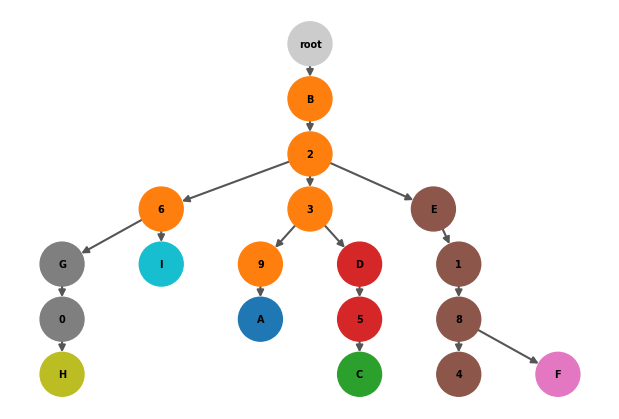

6


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


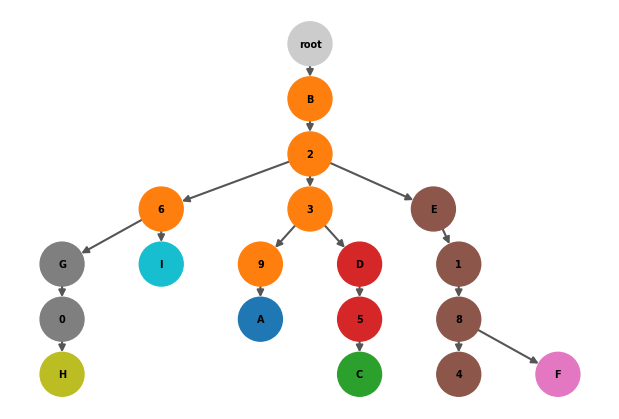

7


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


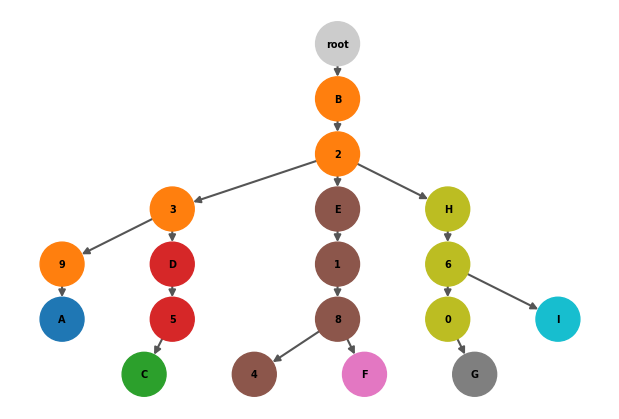

8


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


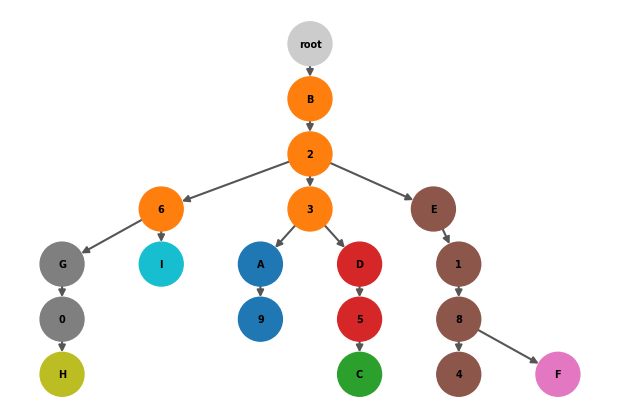

9


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


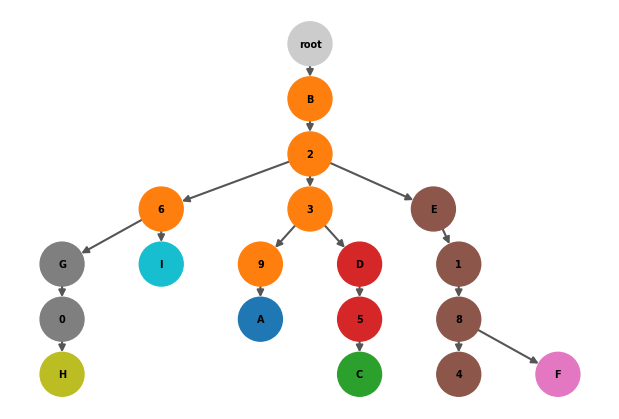

10


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


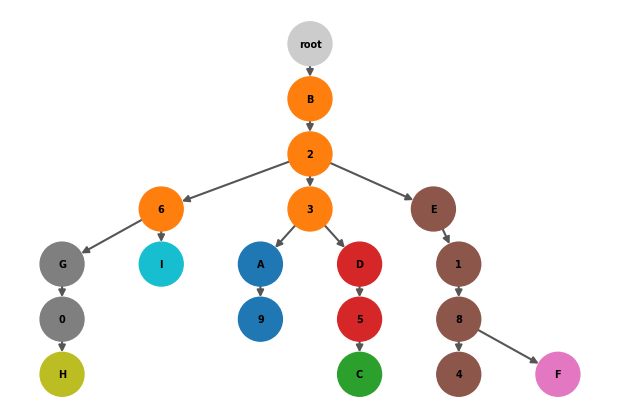

11


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


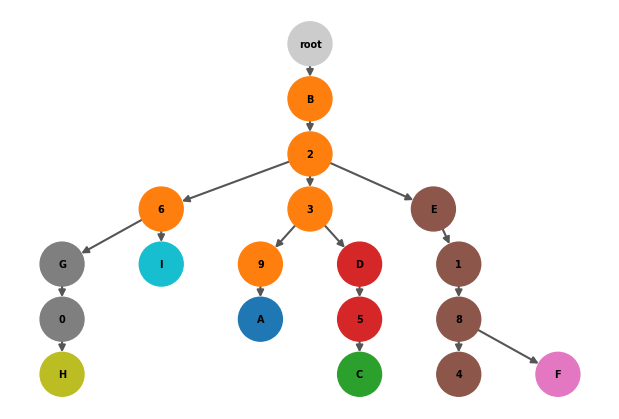

12


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


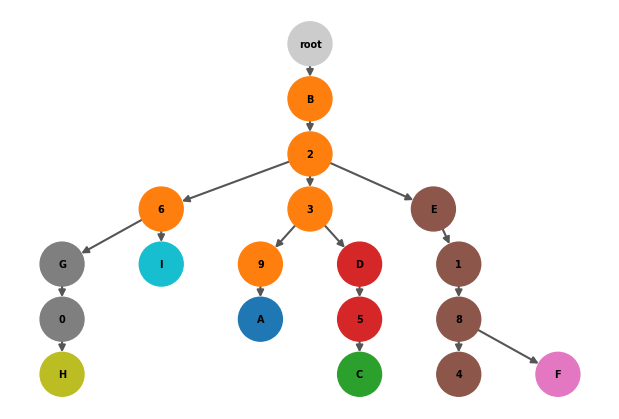

13
6 is being repeated
14
6 is being repeated
15


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


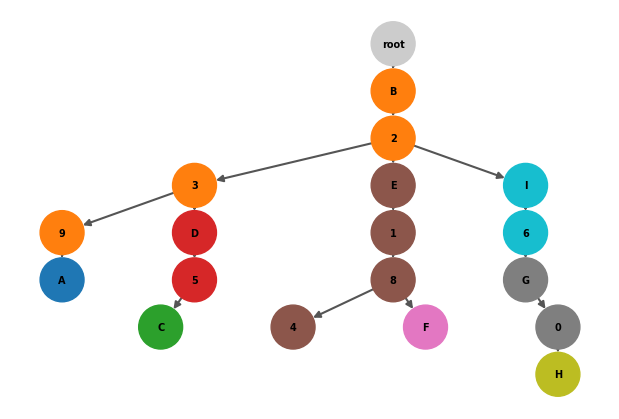

16


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


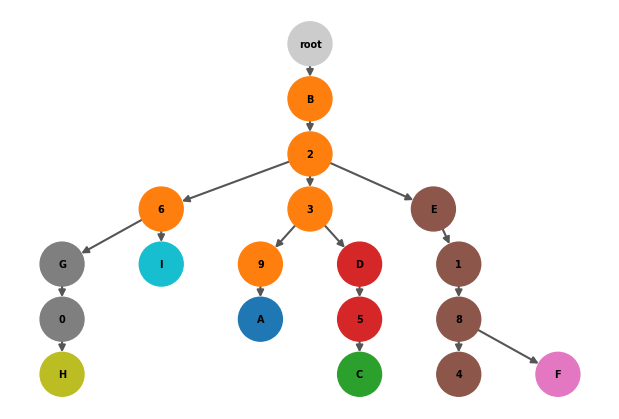

17


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


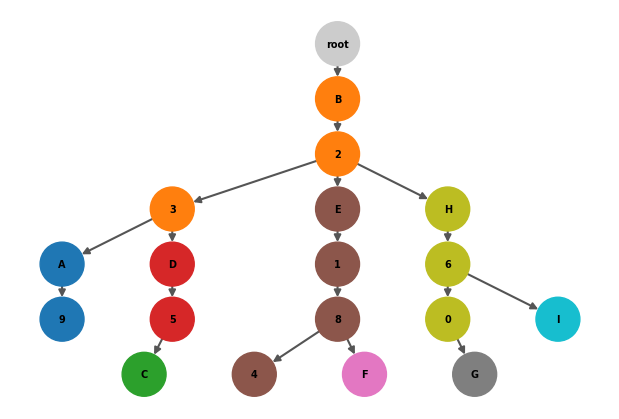

18


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


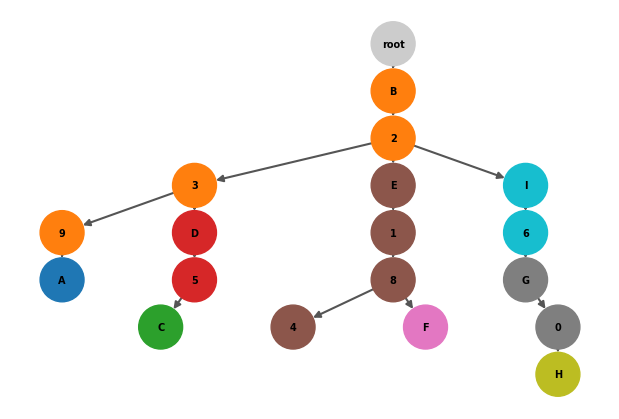

19


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


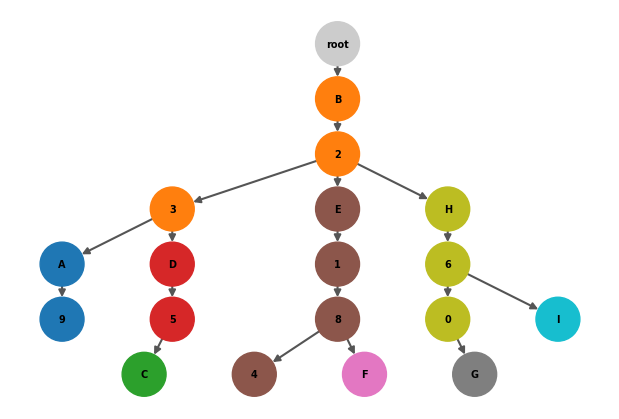

20
6 is being repeated
21
6 is being repeated
22
6 is being repeated
23
6 is being repeated
24
6 is being repeated
25
6 is being repeated
26
6 is being repeated
27
6 is being repeated
28
6 is being repeated
29
6 is being repeated
30
6 is being repeated
31
6 is being repeated
32
6 is being repeated
33
6 is being repeated
34
6 is being repeated
35
6 is being repeated
36
6 is being repeated
37
6 is being repeated
38
6 is being repeated
39
6 is being repeated
40
6 is being repeated
41
6 is being repeated
42
6 is being repeated
43
6 is being repeated
44
6 is being repeated
45
6 is being repeated
46
6 is being repeated
47
6 is being repeated
48
6 is being repeated
49
6 is being repeated


In [169]:
for i, solution in enumerate(solutions):
    try:
        print(i)
        X, B, U, F, G = solution
        solT_mut, solT_cell = generate_perfect_phylogeny(B)
        # draw_clone_tree(solT_mut)
        fixed_T = add_clusters_to_clonal_T(solT_mut, X, G, B)
        # children = list(fixed_T.successors(2))
        # print(children)
        # if i < 5 or len(children) == 1:
        if fixed_T.has_edge('root', 'B'):
            draw_clone_tree(fixed_T)
        # if i > 10:
        #     break
    except Exception as e:
        print(e)